<a href="https://colab.research.google.com/github/KeyserSoze7/Vehicle-Detection-using-Yolo/blob/main/vehicleDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 22.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.6MB/s]


100%|██████████| 104k/104k [00:00<00:00, 59.4MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 89.3ms
Speed: 11.2ms preprocess, 89.3ms inference, 773.0ms postprocess per image at shape (1, 3, 640, 384)


## Training


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Yolo V8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Yolo V8
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

In [ ]:
!ls runs/detect/train/

args.yaml  weights


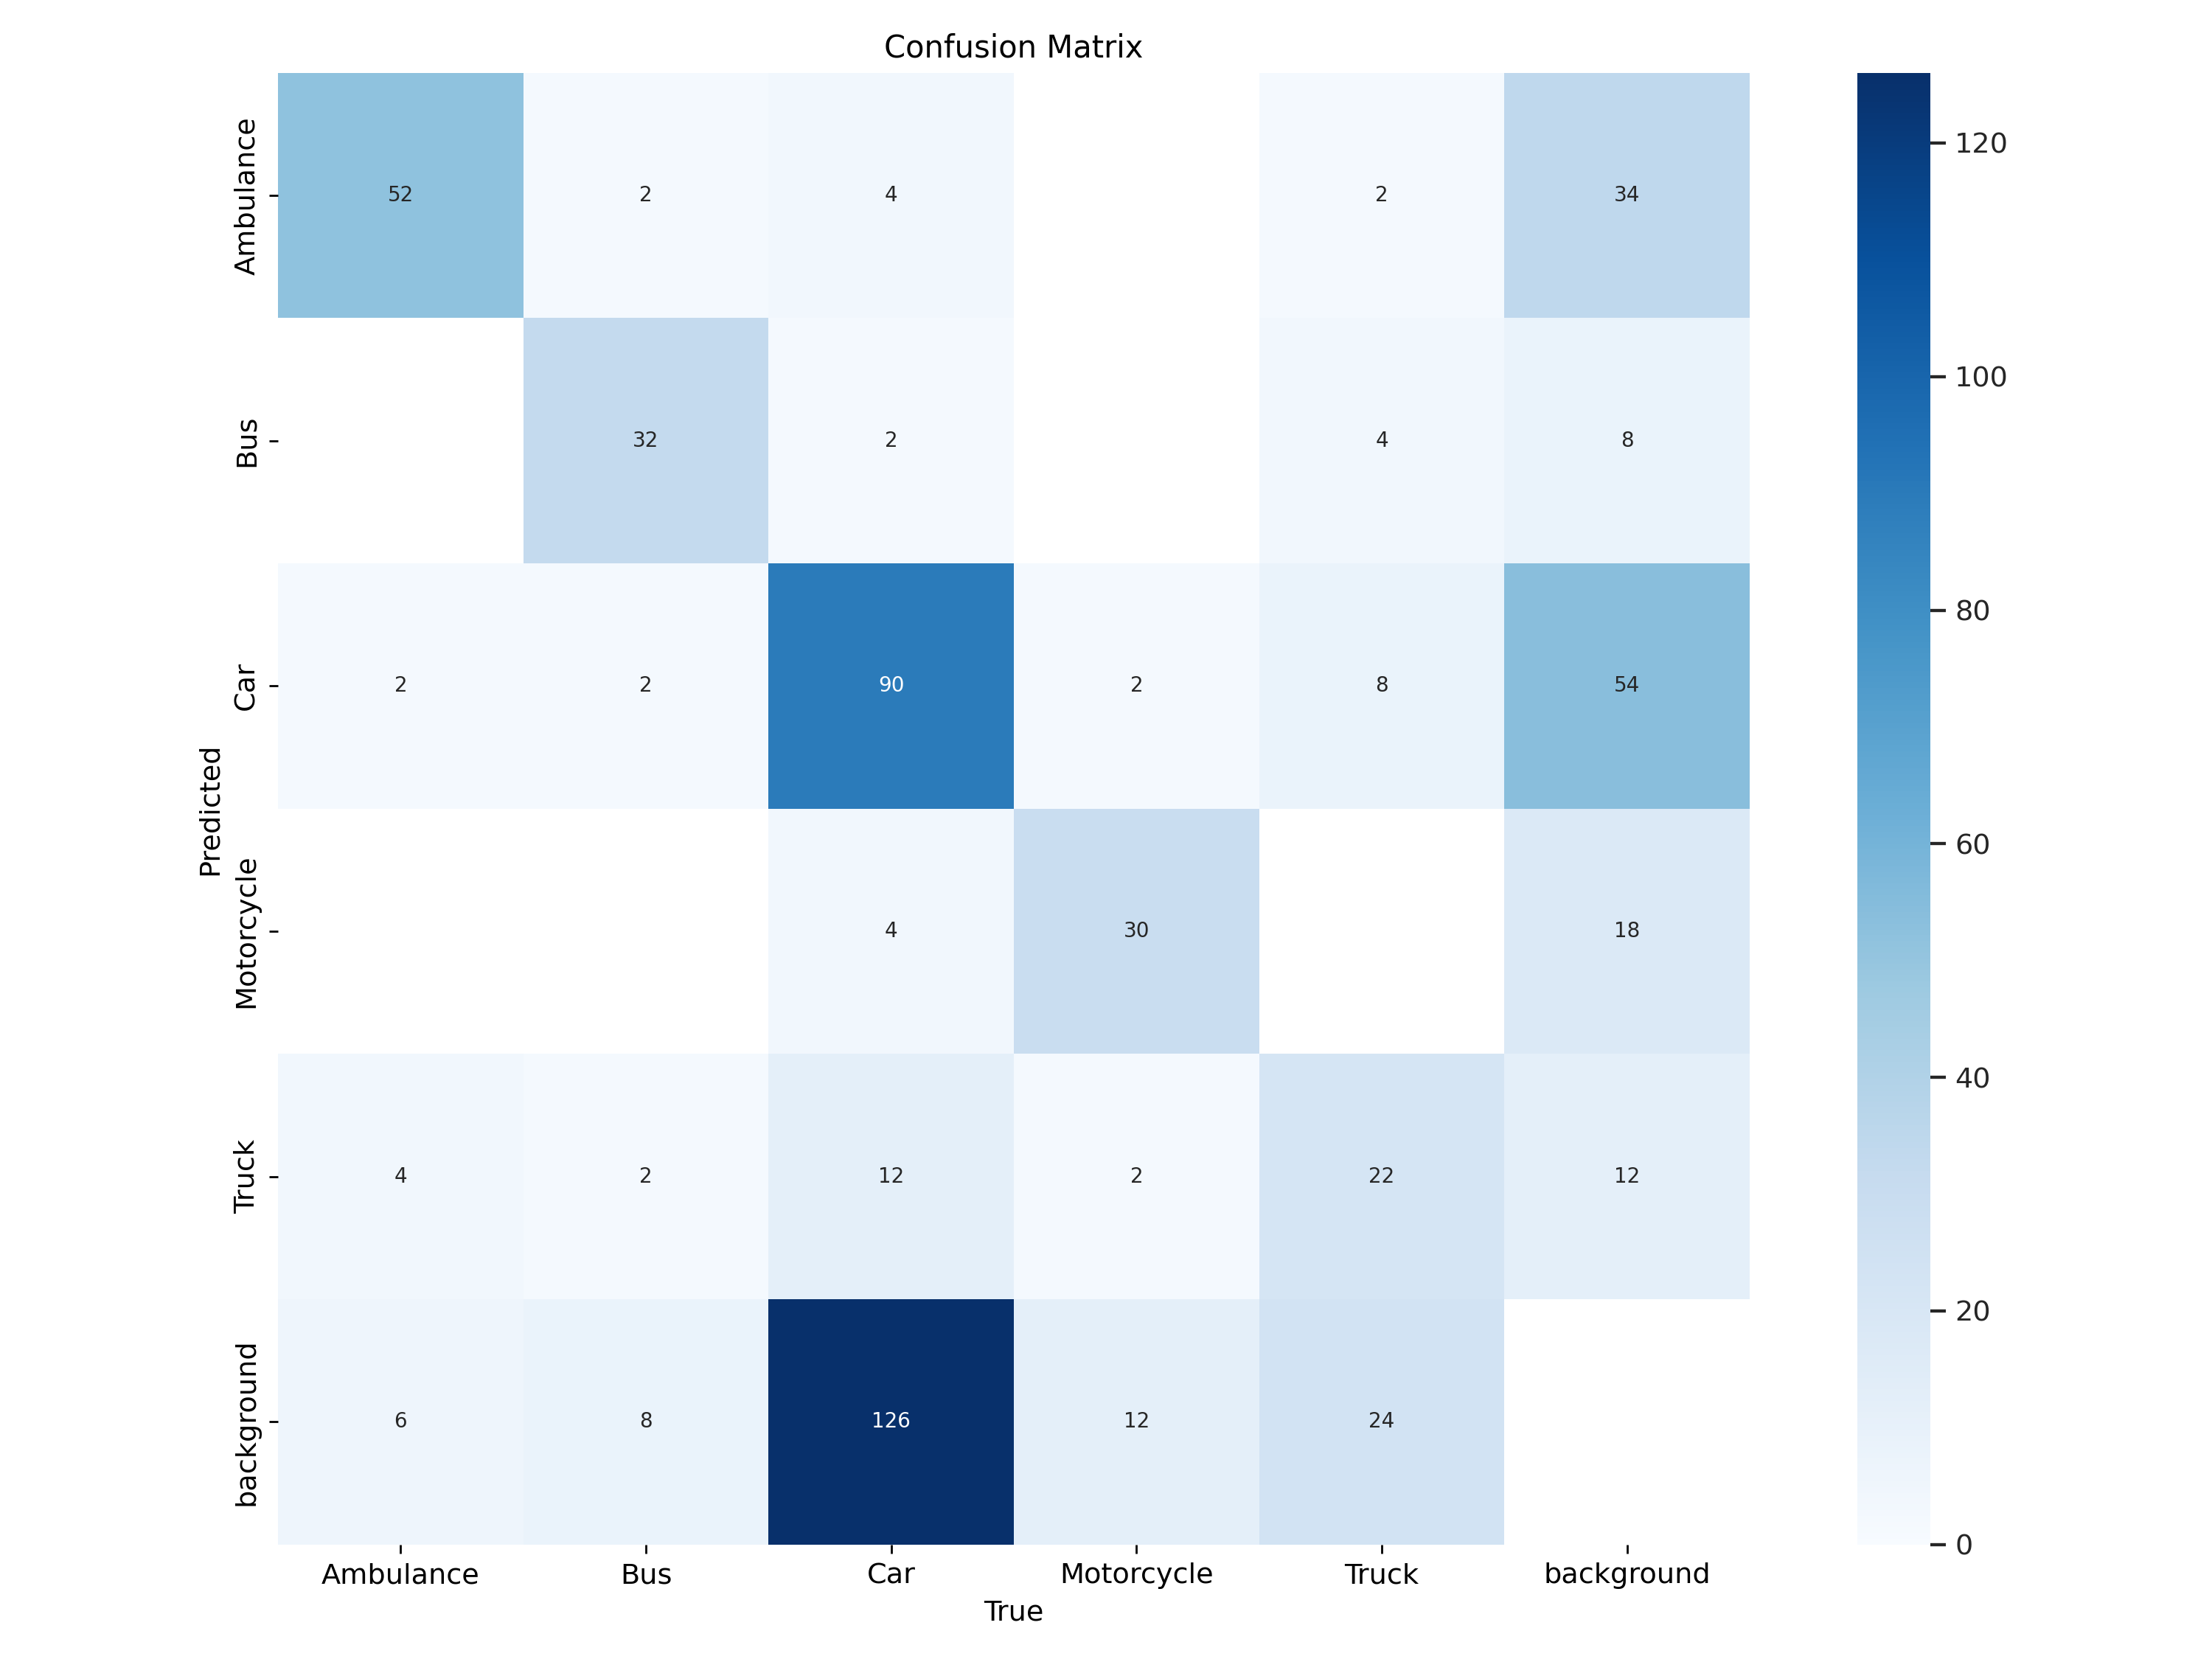

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

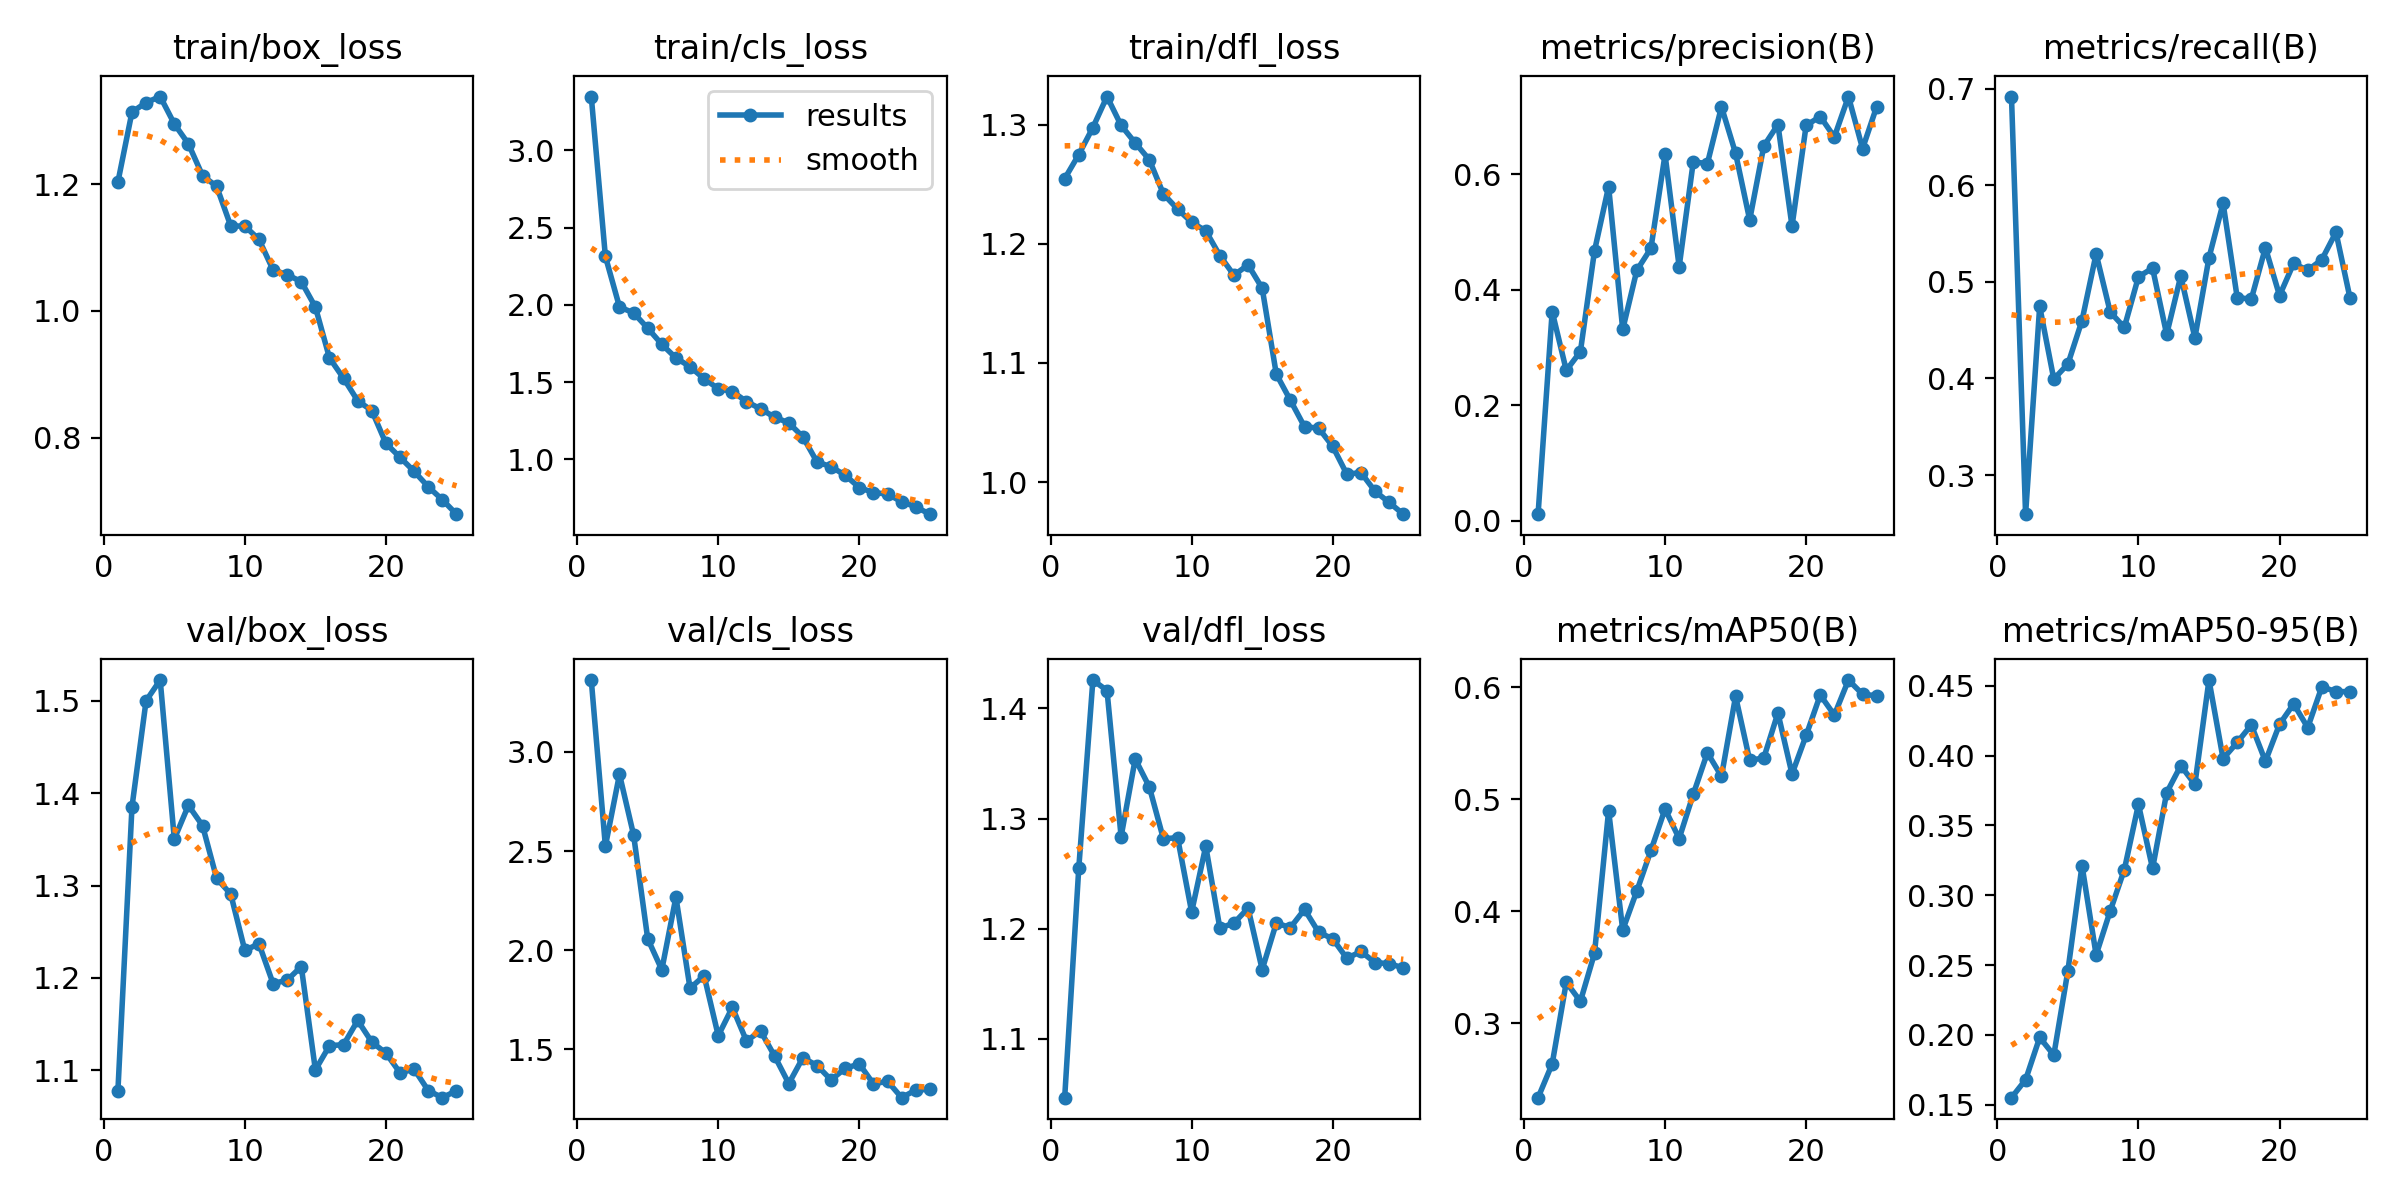

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

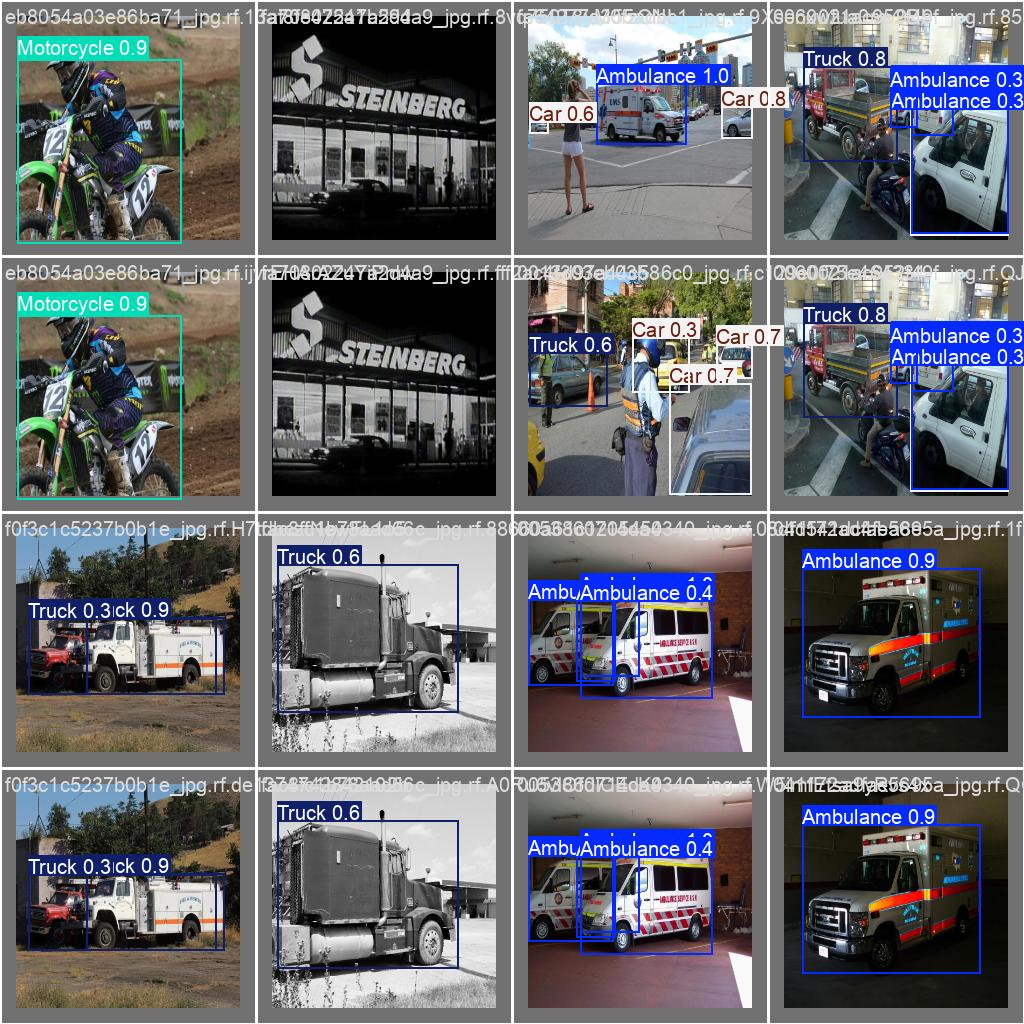

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validating Custom model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo V8/Vehicles-OpenImages.v1-416x416.yolov8/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:03<00:00,  4.31it/s]
                   all        250        454      0.637      0.525      0.591      0.454
             Ambulance         50         64      0.658      0.844      0.862      0.728
                   Bus         30         46      0.807      0.609      0.682      0.584
                   Car         90        238      0.741      0.361      0.468      0.323
            Motorcycle         42         46      0.523      0.478      0.577      0.373
                 Truck         38         60      0.454      0.333      0.367      0.262
Spee

## Inferencing


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images save=True

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs

image 1/126 /content/drive/MyDrive/Yolo V8/data/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 224x224 1 Ambulance, 7.5ms
image 2/126 /content/drive/MyDrive/Yolo V8/data/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg: 224x224 1 Ambulance, 24.0ms
image 3/126 /content/drive/MyDrive/Yolo V8/data/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg: 224x224 3 Buss, 10.4ms
image 4/126 /content/drive/MyDrive/Yolo V8/data/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 224x224 3 Buss, 12.0ms
image 5/126 /content/drive/MyDrive/Yolo V8/data/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg: 224x224 2 Buss, 9.9ms
image 6/126 /content/drive/MyDrive/Yolo V8/data/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg: 224x224 2 Buss, 8

### Sample outputs

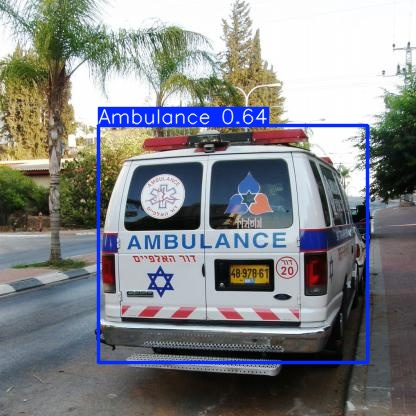

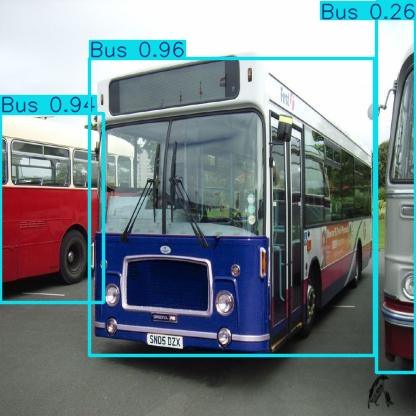

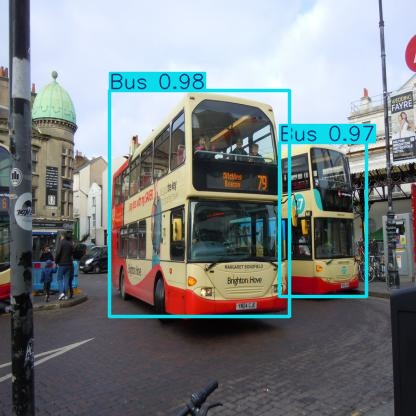

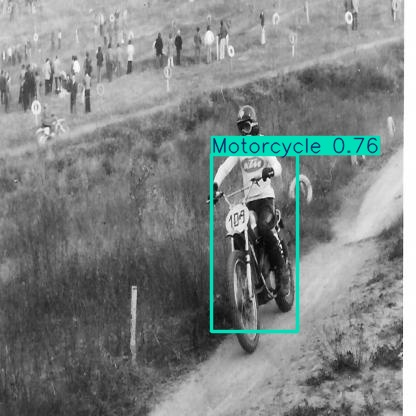

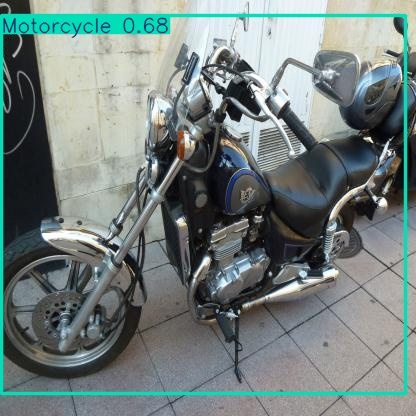

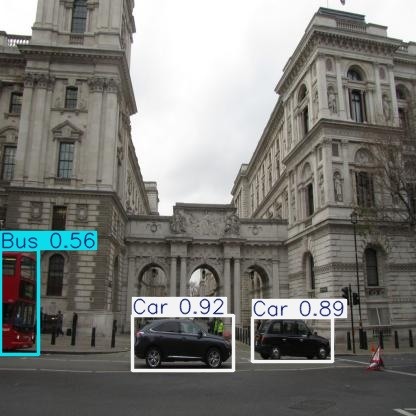

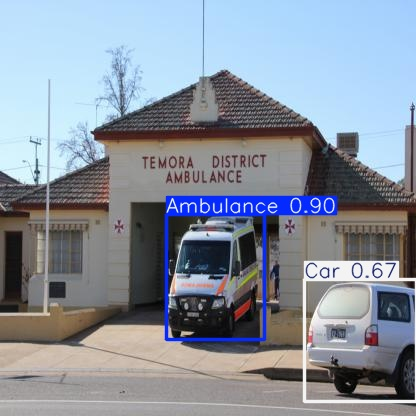

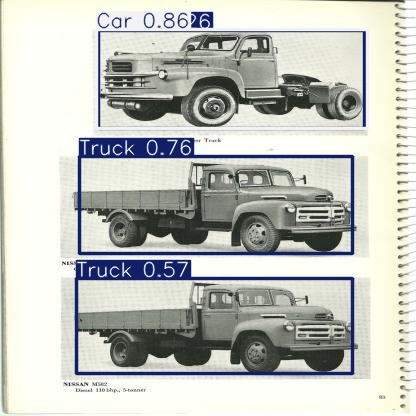

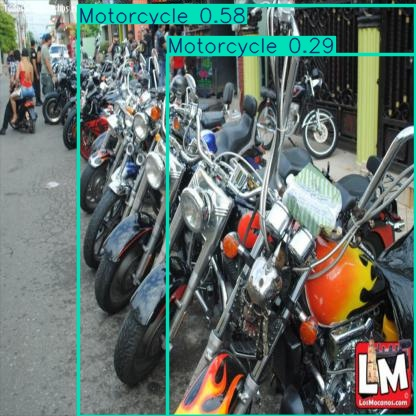

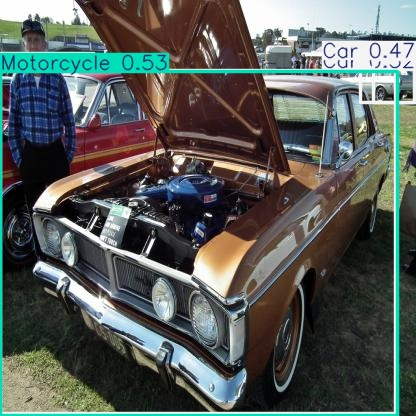

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20:2]:
      display(Image(filename=image_path, width=300))
      print("\n")